<a href="https://colab.research.google.com/github/Fatema2525/machine-learning-and-deep-learning-projects/blob/main/Dog_vs_Cat_Classification_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import os
import zipfile
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

In [21]:
(train_dataset,val_dataset,test_dataset),info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]','train[80%:90%]','train[90%:]'],
    with_info = True,
    as_supervised = True
)

In [22]:
print(f"Dataset loaded succcesfully.")
print(f"Number of training samples:{tf.data.experimental.cardinality(train_dataset).numpy()}")
print(f"Number of validation samples:{tf.data.experimental.cardinality(val_dataset).numpy()}")
print(f"Number of test samples:{tf.data.experimental.cardinality(test_dataset).numpy()}")

Dataset loaded succcesfully.
Number of training samples:18610
Number of validation samples:2326
Number of test samples:2326


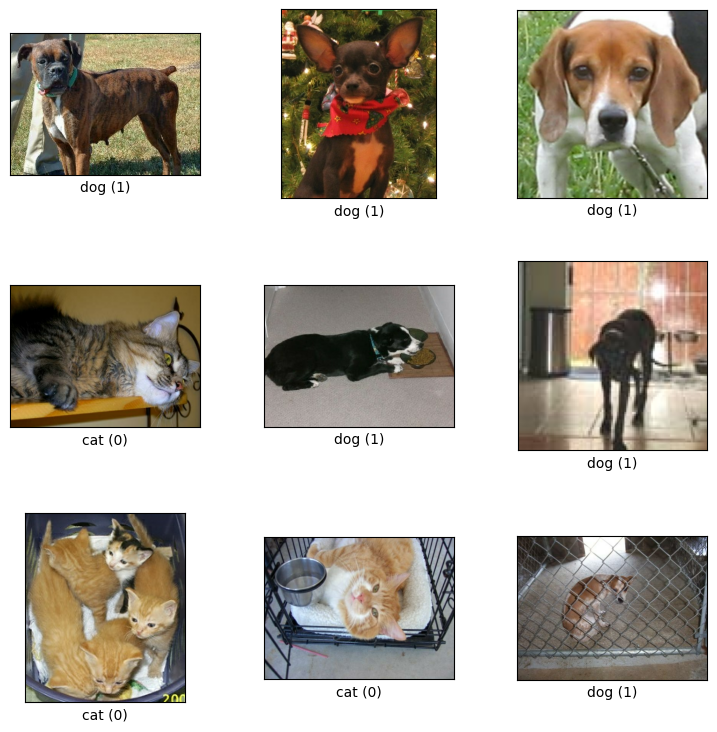

In [23]:
fig = tfds.show_examples(train_dataset,info)

In [24]:
IMG_SIZE = 160
def format_example(image,label):
  image = tf.cast(image,tf.float32)
  image = image/255.0
  image = tf.image.resize(image,(IMG_SIZE,IMG_SIZE))
  return image,label

train = train_dataset.map(format_example)
validation = val_dataset.map(format_example)
test = test_dataset.map(format_example)

In [25]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000
train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

In [26]:
IMG_SHAPE = (IMG_SIZE,IMG_SIZE,3)
base_model = tf.keras.applications.MobileNetV2(
    input_shape = IMG_SHAPE,
    include_top = False,
    weights = 'imagenet'
)

In [27]:
base_model.trainable = False

In [28]:
from tensorflow.keras import layers,models
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.2),
    layers.Dense(1,activation='sigmoid')
])

In [29]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [30]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_160            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [31]:
EPOCHS = 10
history = model.fit(
    train_batches,
    epochs=EPOCHS,
    validation_data=validation_batches
)

Epoch 1/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 519s 859ms/step - accuracy: 0.7213 - loss: 0.5324 - val_accuracy: 0.9531 - val_loss: 0.1523
Epoch 2/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 463s 792ms/step - accuracy: 0.9538 - loss: 0.1417 - val_accuracy: 0.9686 - val_loss: 0.1041
Epoch 3/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 464s 795ms/step - accuracy: 0.9667 - loss: 0.1001 - val_accuracy: 0.9708 - val_loss: 0.0864
Epoch 4/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 507s 801ms/step - accuracy: 0.9696 - loss: 0.0868 - val_accuracy: 0.9716 - val_loss: 0.0773
Epoch 5/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 476s 814ms/step - accuracy: 0.9718 - loss: 0.0773 - val_accuracy: 0.9738 - val_loss: 0.0716
Epoch 6/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 499s 805ms/step - accuracy: 0.9743 - loss: 0.0721 - val_accuracy: 0.9755 - val_loss: 0.0677
Epoch 7/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 470s 803ms/step - accuracy: 0.9755 - loss: 0.0687 - val_accuracy: 0.9768 - val_loss: 0.0651
Epoch 8/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 499s 799ms/step - accuracy: 0.9752 -

In [32]:
test_loss,test_accuracy = model.evaluate(test_batches)
print(f"\nTest accuracy:{test_accuracy:.4f}")
print(f"\Test loss:{test_loss:.4f}")

<>:3: SyntaxWarning: invalid escape sequence '\T'
<>:3: SyntaxWarning: invalid escape sequence '\T'
/tmp/ipython-input-3459964249.py:3: SyntaxWarning: invalid escape sequence '\T'
  print(f"\Test loss:{test_loss:.4f}")


73/73 ━━━━━━━━━━━━━━━━━━━━ 52s 708ms/step - accuracy: 0.9757 - loss: 0.0605

Test accuracy:0.9776
\Test loss:0.0600


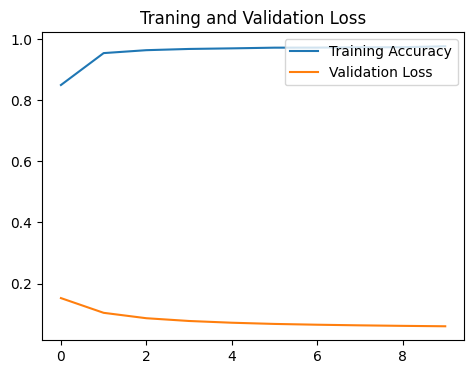

In [33]:
def plot_history(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs_range = range(len(acc))

  plt.figure(figsize=(12,4))
  plt.subplot(1,2,1)
  plt.plot(epochs_range,acc,label='Training Accuracy')
  plt.plot(epochs_range,val_loss,label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Traning and Validation Loss')
  plt.show()
plot_history(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 692ms/step


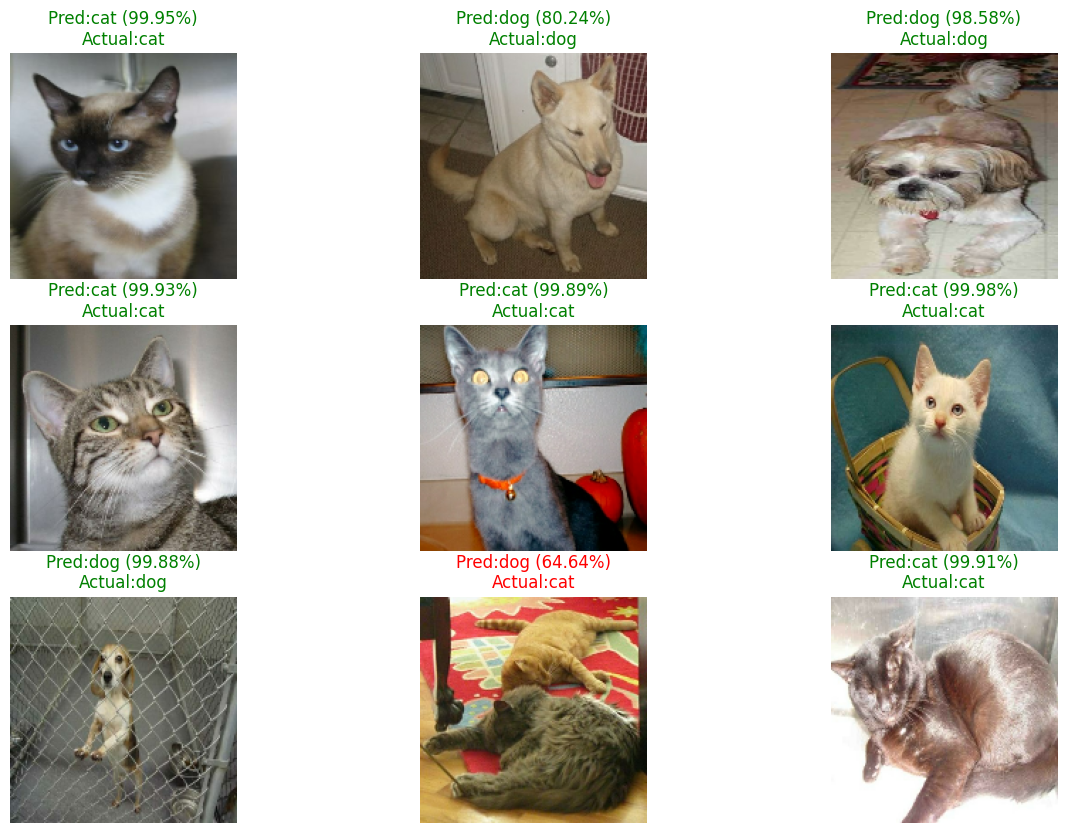

In [36]:
for image_batch,label_batch in test_batches.take(1):
  predictions = model.predict(image_batch)
  plt.figure(figsize=(15,10))
  for i in range(min(9,len(image_batch))):
    plt.subplot(3,3,i+1)
    plt.imshow(image_batch[i].numpy())

    pred = predictions[i][0]
    actual = label_batch[i].numpy()
    pred_class = "dog" if pred> 0.5 else "cat"
    actual_class = "dog" if actual==1 else "cat"

    confidence = pred if pred>0.5 else 1-pred
    color = 'green' if pred_class == actual_class else 'red'

    plt.title(f"Pred:{pred_class} ({confidence:.2%})\nActual:{actual_class}",color=color)
    plt.axis('off')
plt.show()

In [38]:
base_model.trainable = True
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
fine_tune_epochs = 5
total_epochs = EPOCHS + fine_tune_epochs
history_fine = model.fit(
    train_batches,
    epochs=total_epochs,
    initial_epoch=history.epoch[-1],
    validation_data=validation_batches
)

Epoch 10/15
582/582 ━━━━━━━━━━━━━━━━━━━━ 781s 1s/step - accuracy: 0.8864 - loss: 0.2574 - val_accuracy: 0.9772 - val_loss: 0.0797
Epoch 11/15
582/582 ━━━━━━━━━━━━━━━━━━━━ 757s 1s/step - accuracy: 0.9640 - loss: 0.0903 - val_accuracy: 0.9764 - val_loss: 0.0726
Epoch 12/15
582/582 ━━━━━━━━━━━━━━━━━━━━ 785s 1s/step - accuracy: 0.9700 - loss: 0.0732 - val_accuracy: 0.9764 - val_loss: 0.0639
Epoch 13/15
582/582 ━━━━━━━━━━━━━━━━━━━━ 755s 1s/step - accuracy: 0.9785 - loss: 0.0567 - val_accuracy: 0.9785 - val_loss: 0.0634
Epoch 14/15
582/582 ━━━━━━━━━━━━━━━━━━━━ 758s 1s/step - accuracy: 0.9838 - loss: 0.0435 - val_accuracy: 0.9785 - val_loss: 0.0646
Epoch 15/15
582/582 ━━━━━━━━━━━━━━━━━━━━ 790s 1s/step - accuracy: 0.9872 - loss: 0.0367 - val_accuracy: 0.9811 - val_loss: 0.0643


In [39]:
model.save('cats_vs_dogs_model.h5')
loaded_model = tf.keras.models.load_model('cats_vs_dogs_model.h5')
test_loss,test_accuracy = loaded_model.evaluate(test_batches)
print(f"\nLoaded model test accuracy:{test_accuracy:.4f}")


73/73 ━━━━━━━━━━━━━━━━━━━━ 56s 718ms/step - accuracy: 0.9778 - loss: 0.0524

Loaded model test accuracy:0.9781
